# ***TASK-02----> EDA on TITANIC DATASET***

# ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# ***Data Loading***

In [2]:
df=pd.read_csv('./train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.shape

(891, 12)

# ***Data Cleaning***

In [4]:
print(df.info())
print("\nMissing Value\n")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked      

In [5]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [6]:
df["Age"]=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df.Embarked.mode()[0])
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
df["Embarked"]=df["Embarked"].replace({'S':0,'C':1,'Q':2})

# ***EDA(Exploratory Data Analysis)***

In [8]:
df.describe()[['Pclass','Age','SibSp','Parch','Fare']]


,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## ***Count of Different Categories***

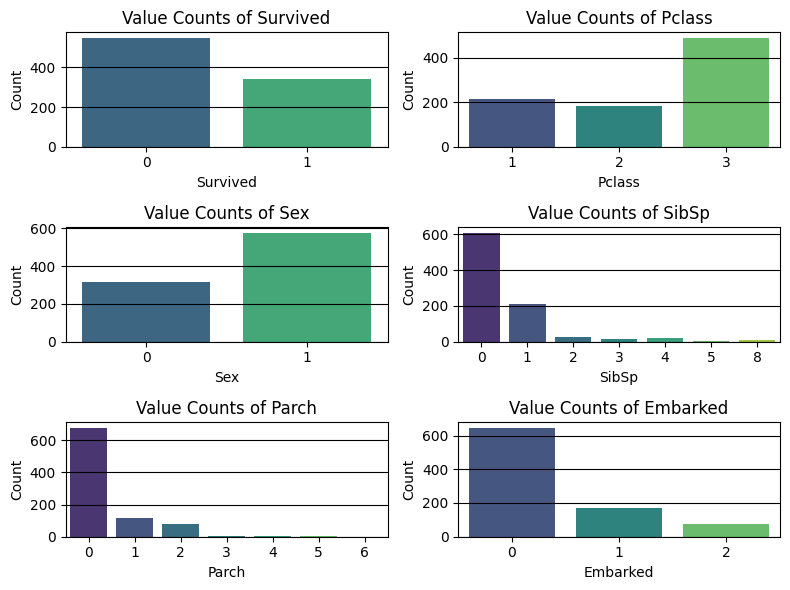

In [9]:
df_pl = [df['Survived'], df['Pclass'], df['Sex'], df['SibSp'], df['Parch'], df['Embarked']]
plot_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=df_pl[i],ax=ax, palette='viridis')
    ax.set_title(f'Value Counts of {plot_names[i]}')
    ax.set_xlabel(plot_names[i])
    ax.set_ylabel('Count')
    ax.grid(True,axis='y',color='black')
plt.tight_layout()
plt.show()

# ***Age Distribution of Passengers***

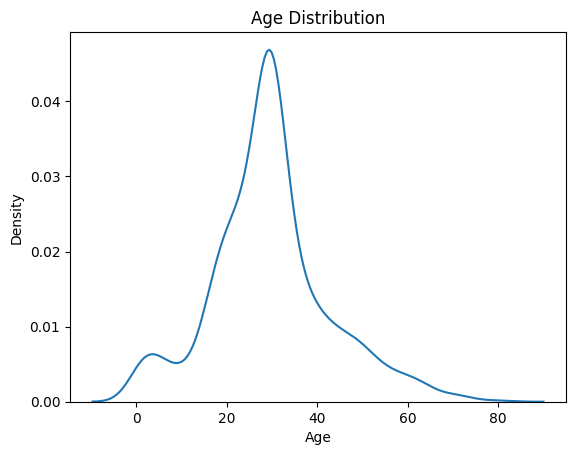

In [10]:
bin=[0,10,20,40,65,100]
sns.distplot(df['Age'],bins=bin,hist=False)
plt.title("Age Distribution")
plt.show()

Here, from the graph ,we can see that the age range of the most of the passengers is around **"20-45"**

---



# ***Age Distribution by Survival***

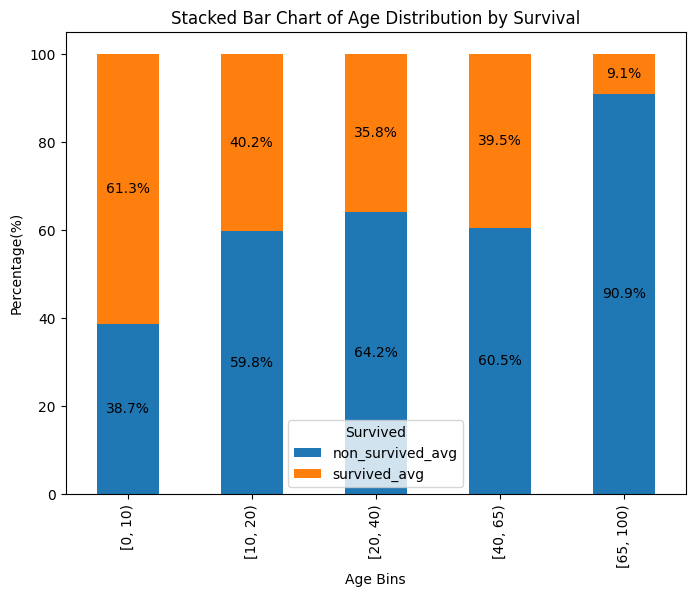

In [11]:
bins = [0, 10, 20, 40, 65, 100]
df['Age_bin'] = pd.cut(df['Age'], bins=bins, right=False)
pivot_df = df.pivot_table(index='Age_bin', columns='Survived', values='Age', aggfunc='count', fill_value=0)
pivot_df["non_survived_avg"] = (pivot_df[0]*100) /(pivot_df[0]+ pivot_df[1])
pivot_df["survived_avg"] = (pivot_df[1]*100) /(pivot_df[0]+ pivot_df[1])
pivot_df=pivot_df[['non_survived_avg','survived_avg']]
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Adding percentage labels to each segment of the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('Age Bins')
plt.ylabel('Percentage(%)')
plt.title('Stacked Bar Chart of Age Distribution by Survival')
plt.show()
df=df.drop(['Age_bin'],axis=1)

Here, from the graph ,we can see that the almost all the older passengers have not survived and the children survival rate is high.


# ***Fare Distribution Of Passengers***

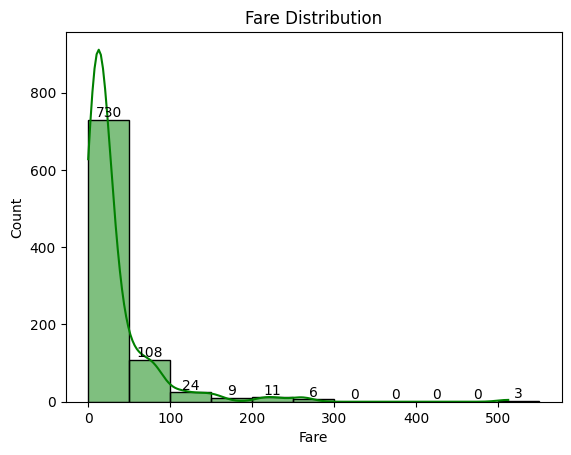

In [12]:
bin=[i for i in range(int(min(df['Fare'])),int(max(df["Fare"]))+50,50)]
sns.histplot(df['Fare'],bins=bin,kde=True,color='g')
ax = plt.gca()  # Get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            f'{int(p.get_height())}',
            ha='center', va='bottom')
plt.title("Fare Distribution")
plt.show()

Here, around **90%** Passengers' ticket fare range is **"0-50"**.

# ***Classwise Passenger Survival Rate***

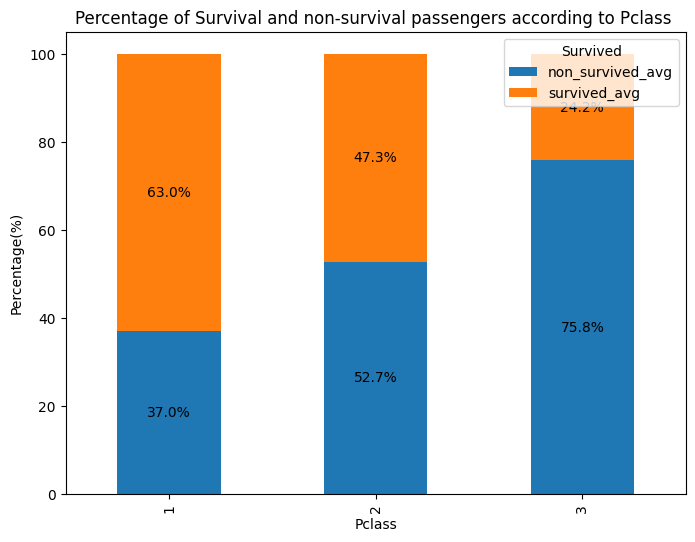

In [13]:
pivot_df1=df.pivot_table(index='Pclass', columns='Survived',
               values='Sex', aggfunc='count', fill_value=0)
pivot_df1["non_survived_avg"] = (pivot_df1[0]*100) /(pivot_df1[0]+ pivot_df1[1])
pivot_df1["survived_avg"] = (pivot_df1[1]*100) /(pivot_df1[0]+ pivot_df1[1])
pivot_df1=pivot_df1[['non_survived_avg','survived_avg']]
ax = pivot_df1.plot(kind='bar', stacked=True, figsize=(8, 6))

# Adding percentage labels to each segment of the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('Pclass')
plt.ylabel('Percentage(%)')
plt.title('Percentage of Survival and non-survival passengers according to Pclass ')
plt.show()


 Here, **Pclass-1** passengers have **higher** survival rate and **Pclass-3** have **lower** survival rate.

# ***GenderWise Survival Rate***

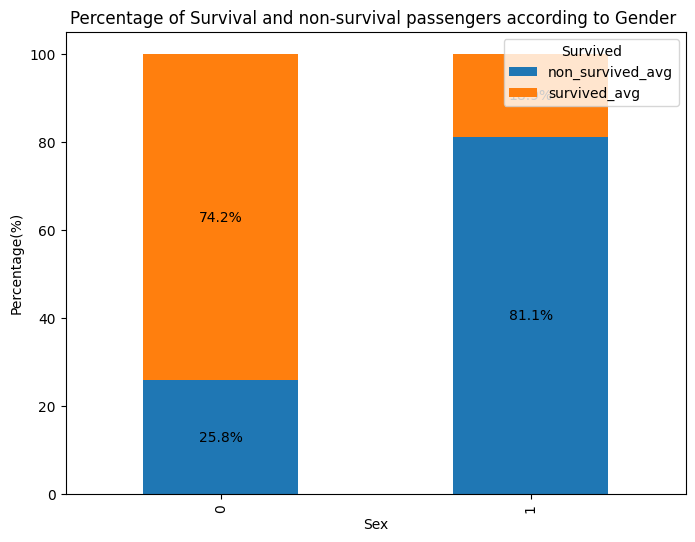

In [14]:
pivot_df1=df.pivot_table(index='Sex', columns='Survived',
               values='Pclass', aggfunc='count', fill_value=0)
pivot_df1["non_survived_avg"] = (pivot_df1[0]*100) /(pivot_df1[0]+ pivot_df1[1])
pivot_df1["survived_avg"] = (pivot_df1[1]*100) /(pivot_df1[0]+ pivot_df1[1])
pivot_df1=pivot_df1[['non_survived_avg','survived_avg']]
ax = pivot_df1.plot(kind='bar', stacked=True, figsize=(8, 6))

# Adding percentage labels to each segment of the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('Sex')
plt.ylabel('Percentage(%)')
plt.title('Percentage of Survival and non-survival passengers according to Gender ')
plt.show()

Here,**Female** passengers have high survival rate.

# ***Sibsp(Sibling and spouse)wise survival rate***

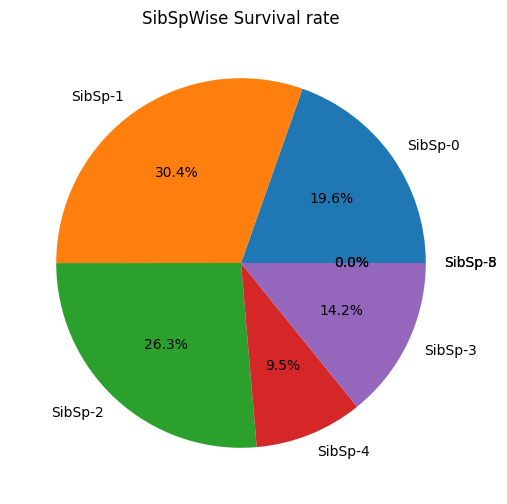

In [15]:
survival_percentages = []
for i in df['SibSp'].value_counts().index:
    counts = df["Survived"][df["SibSp"] == i].value_counts(normalize=True)
    # Check if index 1 (True) exists in the counts
    if 1 in counts:
        survival_percentages.append(counts[1] * 100)
    else:
        survival_percentages.append(0)  # Append 0 if all values were False

plt.figure(figsize=(8, 6))
plt.pie(survival_percentages, labels=[f"SibSp-{i}"  for i in df['SibSp'].value_counts().index], autopct='%1.1f%%', startangle=0)
plt.title('SibSpWise Survival rate')
plt.show()

Clearly,passengers with **more sibsp** have **less survival rate** and with **less sibsp** have **high survival rate**.

# ***Parch(Parents and children)wise survival rate***

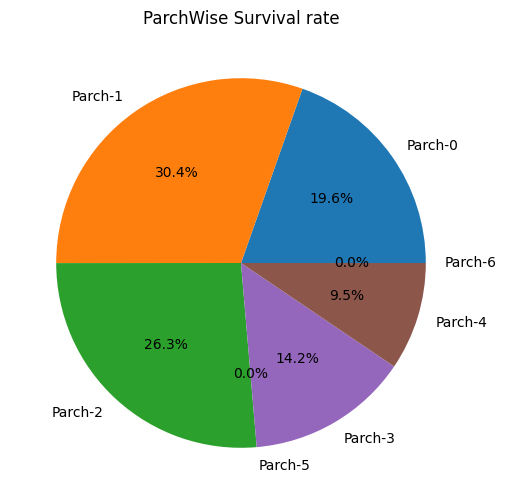

In [16]:
survival_percentages = []
for i in df['Parch'].value_counts().index:
    counts = df["Survived"][df["SibSp"] == i].value_counts(normalize=True)
    if 1 in counts:
        survival_percentages.append(counts[1] * 100)
    else:
        survival_percentages.append(0)
plt.figure(figsize=(8, 6))  # Define the figure size
plt.pie(survival_percentages, labels=[f"Parch-{i}" for i in df['Parch'].value_counts().index], autopct='%1.1f%%', startangle=0)

# Adding title
plt.title('ParchWise Survival rate')

# Display the plot
plt.show()

Clearly,passengers with **more Parch** have **less survival rate** and with **less parch** have **high survival rate**.

# ***Correlation Between Variables***

In [17]:
df.corr()['Survived'].sort_values(ascending=False)[1:]

Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

This shows the **Correlation(Means relationship between survived and others vars)** between Survived variable and others in descending order.

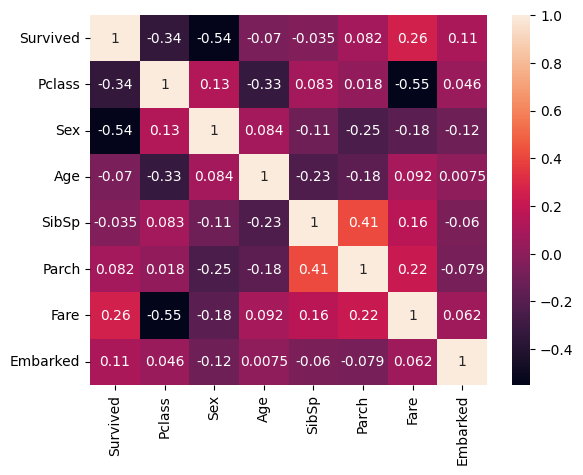

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# ***ThAnK YoU !***